## Instalación de librerías

In [40]:
#!pip install sklearn

# Importamos librerías

In [41]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from copy import deepcopy

# Leemos los datos

In [42]:
data = pd.read_csv('data_0p6Kcnsr.csv', header=None).to_numpy()

In [43]:
print(data)

[[-1.7535 -5.8913 -1.    ]
 [-2.6905 -3.5122 -1.    ]
 [-4.0848 -5.7715 -1.    ]
 ...
 [-5.1032  0.2884  1.    ]
 [-3.4311  1.6003  1.    ]
 [-3.6783  1.0899  1.    ]]


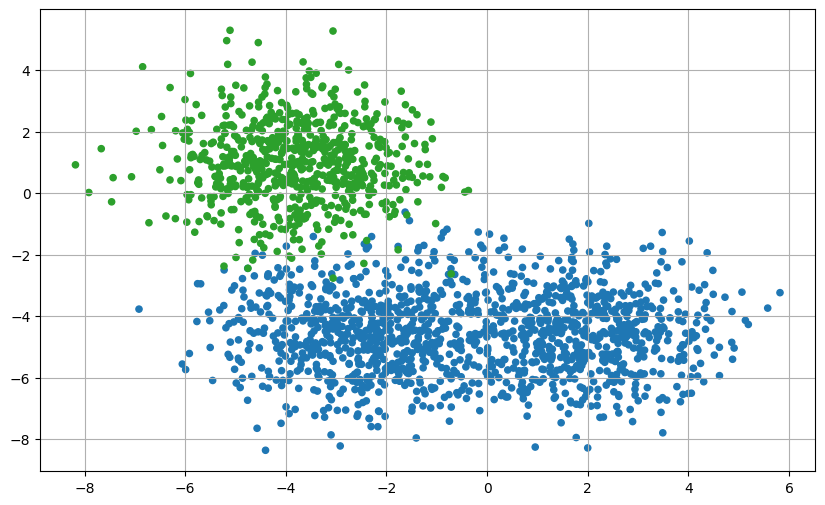

In [44]:
fig, ax = plt.subplots(1, 1, figsize=(10,6))
ax.scatter(data[:,0], data[:,1], 20, [f'C{int(i)+1}' for i in data[:,2]])
plt.grid(True)
plt.show();

# PARTICIONAMOS LOS DATOS Y GUARDAMOS A DISCO

**CONSIGNA 1:** Escriba el código que le permita verificar si los datos están balanceados.

In [45]:
target = data[:, -1]
values, counts =  np.unique(target, return_counts=True)
print(values), print(counts)

[-1.  1.]
[1334  666]


(None, None)

In [46]:
1334+666

2000

**CONSIGNA 2:** Escriba el código para particionar los datos en `train`, `validation` y `test`, y guarde cada conjunto de datos con los nombres `data_trn.csv`, `data_val.csv` y `data_tst.csv` según corresponda. El código debe permitir generar archivos que contengan $65\%$ de los datos para entrenamiento, $15\%$ para validación y $10\%$ para test.

In [47]:
indices = np.arange(len(data))
np.random.shuffle(indices)
data = data[indices]

# idx
train_idx = int(len(data) * 0.75)
validate_idx = train_idx + int(len(data) * 0.15)
test_idx = validate_idx + int(len(data) * 0.10)

train_data = data[:train_idx]
validate_data = data[train_idx:validate_idx]
test_data = data[validate_idx:test_idx]

print(len(train_data)), print(len(validate_data)), print(len(test_data))

1500
300
200


(None, None, None)

In [48]:
print(train_data)

[[-2.6105  0.7612  1.    ]
 [ 1.0692 -4.8135 -1.    ]
 [-0.9103 -4.1552 -1.    ]
 ...
 [-3.343  -5.9903 -1.    ]
 [-3.1475 -1.1709  1.    ]
 [ 1.2579 -2.4623 -1.    ]]


In [49]:
np.savetxt('data_trn.csv', train_data, delimiter=',')
np.savetxt('data_val.csv', validate_data, delimiter=',')
np.savetxt('data_tst.csv', test_data, delimiter=',')

# LEVANTAMOS LOS DATOS DE DISCO

**NOTA**: Verifique que la carga de datos se realice correctamente de acuerdo a lo visto en la teoría.

In [50]:
filename_train = 'data_trn.csv'
filename_validation = 'data_val.csv'
filename_test = 'data_tst.csv'

### Entrenamiento

In [51]:
data = pd.read_csv(filename_train, header=None).to_numpy() # Levanta los datos en formato numpy
print(data)

[[-2.6105  0.7612  1.    ]
 [ 1.0692 -4.8135 -1.    ]
 [-0.9103 -4.1552 -1.    ]
 ...
 [-3.343  -5.9903 -1.    ]
 [-3.1475 -1.1709  1.    ]
 [ 1.2579 -2.4623 -1.    ]]


# Train

In [38]:
#------------------------------------
# INSERTAMOS COLUMNA DEL "BIAS"
#------------------------------------
bias = -np.ones((len(data), 1))
data = np.concatenate((data, bias), axis=1)  # Insertamos el "bias"

#------------------------------------
# ALEATORIZO LOS PATRONES (filas)
#------------------------------------
idxs = np.arange(len(data))  # Genero un vector de índices
np.random.shuffle(idxs)
data = data[idxs,:]

#------------------------------------
# SEPARO LOS DATOS
#------------------------------------
X_trn = data[:,:-1]
Y_trn = data[:,-1]  # La clase está en la última columna

### Validación

In [14]:
data = pd.read_csv(filename_validation, header=None).to_numpy() # Levanta los datos en formato numpy

#------------------------------------
# INSERTAMOS COLUMNA DEL "BIAS"
#------------------------------------
bias = -np.ones((len(data), 1))
data = np.concatenate((bias, data), axis=1)  # Insertamos el "bias" en la primera columna

#------------------------------------
# ALEATORIZO LOS PATRONES (filas)
#------------------------------------
idxs = np.arange(len(data))  # Genero un vector de índices
np.random.shuffle(idxs)
data = data[idxs,:]

#------------------------------------
# SEPARO LOS DATOS
#------------------------------------
X_val = data[:,:-1]
Y_val = data[:,-1]  # La clase está en la última columna

### Test

In [16]:
data = pd.read_csv(filename_test, header=None).to_numpy() # Levanta los datos en formato numpy

#------------------------------------
# INSERTAMOS COLUMNA DEL "BIAS"
#------------------------------------
bias = -np.ones((len(data), 1))
data = np.concatenate((bias, data), axis=1)  # Insertamos el "bias" en la primera columna

#------------------------------------
# ALEATORIZO LOS PATRONES (filas)
#------------------------------------
idxs = np.arange(len(data))  # Genero un vector de índices
np.random.shuffle(idxs)
data = data[idxs,:]

#------------------------------------
# SEPARO LOS DATOS
#------------------------------------
X_tst = data[:,:-1]
Y_tst = data[:,-1]  # La clase está en la última columna

# FUNCIONES AUXILIARES

In [17]:
def Tanh(x):
    '''
    Función tangente hiperbólica [-1,1].
    '''
    return np.tanh(x)

#======================================================
def dTanh(x):
    '''
    Derivada de la función tangente hiperbólica.
    '''
    return 0.5 * (1 - x) * (1 + x)

**CONSIGNA 3:** Escriba el código para una función que le permita calcular, a partir de las salidas deseadas (`Yd`) y predichas (`Yp`) las siguientes medidas:
- TP (Verdaderos Positivos)
- TN (Verdaderos Negativos)
- FP (Falsos positivos)
- FN (Falsos Negativos)
- Accuracy

In [3]:
def medidas(Yd, Yp):
    TP = 0
    TN = 0
    FP = 0
    FN = 0
    for yd, yp in zip(Yd, Yp):
        if yd == 1 and yp == 1:
            TP += 1
        elif yd == -1 and yp == -1:
            TN += 1
        elif yd == 1 and yp == -1:
            FN += 1
        elif yd == -1 and yp == 1:
            FP += 1

    Accuracy = (TP + TN) / (TP + TN + FP + FN)

    return TP, TN, FP, FN, Accuracy

In [4]:
Yd = [1, -1, 1, 1, -1, 1, -1, 1, -1, -1]
Yp = [1, -1, 1, -1, -1, 1, 1, 1, -1, 1]

TP, TN, FP, FN, accuracy = medidas(Yd, Yp)

# SETUP EXPERIMENTAL

In [19]:
learning_rate = 1E-10


acc = 0.  # Inicializo el accuracy inicial
epoca = 0  # Inicializo contador de épocas

MIN_ACC = 1.0  # Defino mínimo accuracy deseado

MIN_ERROR = 1E6  # Inicializo la variable para
                  # registrar el mínimo error cometido.
    
MAX_EPOCAS = 100  # Defino el número máximo de épocas
                  # de entrenamiento.

MAX_COUNTER = 10  # Defino el máximo número de épocas
                  # sin mejorar el error de validación
                  # para detener el entrenamiento.


#=============================================
# ENTRENAMIENTO
#=============================================
error = []  # Inicializo estructura para almacenar
            # los errores en el tiempo
accuracy = []  # Inicializo estructura para almacenar
               # el accuracy en el tiempo

STOP = False
counter = 0

best_model_weights = None

**CONSIGNA 4:** Escriba el código para inicializar correctamente el perceptrón

In [20]:
num_features = 2
W = np.random.randn(num_features)

In [103]:
W

array([-0.57732249,  1.38631253])

In [83]:
X_trn

array([[-2.9753, -4.2255],
       [-1.0083, -4.5687],
       [-5.0971,  0.1983],
       ...,
       [-3.9571, -4.1546],
       [ 2.355 , -4.5652],
       [ 3.4524, -5.8744]])

In [104]:
Y_trn = X_trn[:, :-1]
X_trn = X_trn[:,:2]



# ENTRENAMIENTO

In [ ]:
while (epoca < MAX_EPOCAS) and (acc < MIN_ACC) and (not STOP):

    epoca += 1
    
    #====================================================
    # ENTRENAMIENTO
    #======================
    for idx,(x,yd) in enumerate(zip(X_trn,Y_trn)):
        
        # Pasada hacia adelante        
        yp = np.tanh(W @ x)
        
        W = W + 0.5 * learning_rate * dTanh(yp) * (yd - yp) * x
        
    #====================================================
    
    
    #====================================================
    # VALIDACION
    #======================
    N = len(Y_val)
    Yd = np.zeros(N)
    Yp = np.zeros(N)
    e = 0
    for idx,(x,yd) in enumerate(zip(X_val,Y_val)):

        # Cálculo de la salida        
        yp = np.tanh(W @ x)
        
        # Almaceno las salidas
        Yd[idx] = yd
        Yp[idx] = yp

        e += (yp - yd)**2
    
    e /= N
    #====================================================
    
    
    #====================================================
    # CALCULO DE MEDIDAS
    # (TP, TN, FP, FN, ACCURACY)
    #=============================
    tp, tn, fp, fn, acc = medidas(Yd, Yp)
    
    #====================================================
    
    
    #----------------------
    # ALMACENO MEDIDAS
    #----------------------
    error.append(e)
    accuracy.append(acc)
    
    
    #-----------------------------------------------
    # CRITERIO DE CORTE Y ALMACENAMIENTO DEL MODELO
    #-----------------------------------------------
    if (e < MIN_ERROR):
        MIN_ERROR = e
        counter = 0
        
        #·······················
        # Almaceno el modelo
        #·······················
        best_model_weights = W.copy()
        
    else:
        counter += 1
        if counter > MAX_COUNTER:
            STOP = True
    
    #--------------------------------------------
    # MUESTRO REPORTE POR PANTALLA (POR EPOCA)
    #--------------------------------------------
    if (epoca % 10) == 0:
        print(f'Epoca: {epoca} -- Error: {e:.4} -- Tasa acierto [train]: {acc}\n')
#===============================================================

#--------------------------------------------
# MUESTRO REPORTE POR PANTALLA (FINAL)
#--------------------------------------------
print('='*83)
print(f'FINAL -- Epoca: {epoca} -- Error: {e:.4} -- Tasa acierto [train]: {acc:.4} -- Contador: {counter}')
print('='*83)

#----------------------------------------------
# GUARDAMOS LOS PESOS DEL MEJOR MODELO A DISCO
#----------------------------------------------
np.savetxt('best_model_weights.csv', best_model_weights, delimiter=',')

### Graficación

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(30,6))

epocas = np.arange(epoca)

# ERROR
ax[0].plot(epocas, error, 'o-r', lw=2)
ax[0].grid(True)
ax[0].set_xlim(0,MAX_EPOCAS)
ax[0].set_xlabel('Epocas', fontsize=12)
ax[0].set_ylabel('MSE', fontsize=12)

# ACC
ax[1].plot(epocas, accuracy, 'o-b', lw=2)
ax[1].grid(True)
ax[1].set_xlim(0,MAX_EPOCAS)
ax[1].set_xlabel('Epocas', fontsize=12)
ax[1].set_ylabel('Acc', fontsize=12)

# CLASIFICACION

C = []
for i in range(len(Yd)):
    if (np.sign(Yd[i]) == np.sign(Yp[i])) and (Yd[i] == 1):
        C.append('blue')
    if (np.sign(Yd[i]) == np.sign(Yp[i])) and (Yd[i] == -1):
        C.append('red')
    if (np.sign(Yd[i]) != np.sign(Yp[i])) and (Yd[i] == 1):
        C.append('cyan')
    if (np.sign(Yd[i]) != np.sign(Yp[i])) and (Yd[i] == -1):
        C.append('magenta')
        
ax[2].scatter(X_val[:,1], X_val[:,2], 20, C)

#-----------------------------------------------
# CONSTRUCCION DE LA FRONTERA DE DECISION
x = np.array([X_val[:,1].min(), X_val[:,1].max()])
b = W[0]/W[2]
m = W[1]/W[2]

ax[2].plot(x, b - m * x, '-k', lw=2)
ax[2].set_xlim(X_val[:,1].min(), X_val[:,1].max())
ax[2].set_ylim(X_val[:,2].min(), X_val[:,2].max())
ax[2].grid(True)

# TEST

In [ ]:
#=====================================
# LEVANTAMOS DE DISCO EL MEJOR MODELO
#=====================================
w = np.loadtxt('best_model_weights.csv', delimiter=',')


#====================================================
# TESTEO
#======================
N = len(Y_tst)
Yd = np.zeros(N)
Yp = np.zeros(N)

for idx,(x,yd) in enumerate(zip(X_tst,Y_tst)):

    # Cálculo de la salida
    yp = np.tanh(w @ x)

    # Cálculo de las métricas
    Yd[idx] = yd
    Yp[idx] = yp

    
#====================================================
# CALCULO DE MEDIDAS
# (TP, TN, FP, FN, ACCURACY)
#=============================
tp, tn, fp, fn, acc = medidas(Yd, Yp)


print('\nTasa acierto [test]: {}\n'.format(acc))

print('Pesos [W]: {}\n\n'.format(W))

### Graficación

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(10,6))

C = []
for i in range(len(Yd)):
    if (np.sign(Yd[i]) == np.sign(Yp[i])) and (Yd[i] == 1):
        C.append('blue')
    if (np.sign(Yd[i]) == np.sign(Yp[i])) and (Yd[i] == -1):
        C.append('red')
    if (np.sign(Yd[i]) != np.sign(Yp[i])) and (Yd[i] == 1):
        C.append('cyan')
    if (np.sign(Yd[i]) != np.sign(Yp[i])) and (Yd[i] == -1):
        C.append('magenta')
        
ax.scatter(X_tst[:,1], X_tst[:,2], 20, C)

#-----------------------------------------------
# CONSTRUCCION DE LA FRONTERA DE DECISION
x = np.array([X_tst[:,1].min(), X_tst[:,1].max()])
b = W[0]/W[2]
m = W[1]/W[2]

ax.plot(x, b - m * x, '-k', lw=2)
ax.set_xlim(X_tst[:,1].min(), X_tst[:,1].max())
ax.set_ylim(X_tst[:,2].min(), X_tst[:,2].max())
ax.grid(True)